In [0]:
! pip install textract

In [0]:
!pip install pdfminer.six

In [0]:
#importing packages
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO

In [0]:
#importing packages
import textract
import string
import operator
import re
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import nltk

from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
# read resume in pdf format
text = textract.process('resume_job.pdf', method='pdfminer')
text = text.decode("utf-8") 

In [0]:
# uncleaned resume
text

'ANSHUL VERMA\nav.vermaans@gmail.com | anshul.verma@mail.utoronto.ca\n˘ +1(647)975-4767 | (cid:176) linkedin.com/in/vanshul\n\n| (cid:135) github.com/Anshul22Verma\n\nEDUCATION\n\nUniversity of Toronto (GPA: 4.00/4.00)\nMaster of Engineering in Electrical and Computer Engineering\n\nToronto, ON\nMay, 2020\n\nGraduate Coursework-\nControl of Discrete-Event Systems, Game Theory and Evolutionary Games, Control of Stochastic Systems, Information Theory,\nIntroduction to Non-Linear Control System, Digital Image Processing, Machine Learning, Introduction to Cloud Computing*,\nIntroduction to Data Science and Analytics*\n(*indicates currently pursued)\n\nIndian Institute of Technology Madras (GPA: 8.57/10.00)\nBachelor of Technology in Engineering Physics\n\nChennai, India\nMay, 2018\n\nRelevant Undergraduate Coursework-\nInstrumentation and Process Control, Modern Control Theory, Applied Time Series Analysis, Image Processing, Analog Circuits,\nQuantum Mechanics, Statistical Physics, Mathema

In [0]:
rsrcmgr = PDFResourceManager()
retstr = StringIO()
codec = 'utf-8'  # 'utf16','utf-8'
laparams = LAParams()
device = TextConverter(rsrcmgr, retstr, laparams=laparams)
#open resume as pdf
fp = open('resume_job.pdf', 'rb')
interpreter = PDFPageInterpreter(rsrcmgr, device)
password = ""
maxpages = 0
caching = True
pagenos = set()
for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password, caching=caching, check_extractable=True):
    interpreter.process_page(page)
fp.close()
device.close()
check = retstr.getvalue()
retstr.close()
check = str(check)

In [0]:
check == text

True

In [0]:
#importing stop words
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))

#making a list of words attached to punctuation marks
list1 = ["'ll","'t","'ve'"]
#removing above list by looping through each elemnt of stor words list
for s in stop_words:
    for l in list1:
        if l in s:
            s = s.replace(l,'')
            stop_words.append(s)
#add the removed sections sepratly to the list
list2 = ["ll","t","ve"]
for li in list2:
    stop_words.append(li)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [0]:
#cleaning resume
def resume_cleaning(text):
    global stop_words
    #lower case the entire 
    text = text.lower()
    #removing \\n 
    text= text.replace('\n', " ")
    #removing _ from
    text= text.replace('_', " ")
    #removing html tags
    cleanr = re.compile('<.*?>|&([a-z0-9]|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    text = re.sub(cleanr, '', text)
    #removing numbers
    text = ''.join(i for i in text if not i.isdigit())
    #removing punctuations
    punctuation = string.punctuation.replace('+', "")
    text = ''.join(c for c in text if c not in set(punctuation))
    #remove go to the next page 
    text = text.replace("\x0c", "")
    text = text.replace("\x0b", "")                
    #removing stop words from the tweets
    text = " ".join(i for i in text.split() if i not in stop_words)
    return text

In [0]:
#cleaning resume
resume = resume_cleaning(text)

In [0]:
#overview of resume
resume

'anshul verma avvermaansgmailcom anshulvermamailutorontoca ˘ + cid linkedincominvanshul cid githubcomanshulverma education university toronto gpa master engineering electrical computer engineering toronto may graduate coursework control discreteevent systems game theory evolutionary games control stochastic systems information theory introduction nonlinear control system digital image processing machine learning introduction cloud computing introduction data science analytics indicates currently pursued indian institute technology madras gpa bachelor technology engineering physics chennai india may relevant undergraduate coursework instrumentation process control modern control theory applied time series analysis image processing analog circuits quantum mechanics statistical physics mathematical physics data structures algorithms skills programming cc++ python r scilab vhdl basic proﬁciency verilog basic proﬁciency sql software matlab mysqlworkbench solidworks arduino autocad ltspice l

In [0]:
#making dictionary of degrees with different wording for each degree
degrees = {'masters': 'master', 'master': 'master', 'masc': 'master', 'meng': 'master', 'ms': 'master',\
           'phd': 'phd', 'doctor': 'phd',\
           'bachelor': 'bachelor', 'btech': 'bachelor', 'bs': 'bachelor'}
#append right degree name into resume
resume_degree = []
for word in resume.split(' '):
  if word in degrees.keys():
    if degrees[word] not in resume_degree:
      resume_degree.append(degrees[word])
resume_degree

['master', 'bachelor']

<h2>Scoring and extracting skills from the resume.</h2>

In [0]:
#grouping skills 
skills_type = {'acumendesign': 'visualization', 'python':'python', 'sql':'sql', 'excel':'excel', 'java':'java', 'c':'c', 'c+': 'c+', 'c++': 'c++', 'r': 'r', 'tableau': 'visaulization', 
               'spark':'big data', 'hadoop':'big data', 'm': 'sql', 'azure': 'cloud', 'tensorflow': 'framework', 'acumen': 'visualization','design': 'analytics',\
               'sap': 'framework', 'd3': 'visualization', 'cloud': 'cloud', 'data mining': 'big data', 'creating algorithms': 'ml','data manipulation': 'big data', \
               'data wrangling': 'big data', 'big data':'big data', 'api': 'cloud', 'apiengine':'cloud', 'aws': 'visualization', 'dplyr': 'sql', \
               'information retrieval':'big data', 'interpreting data':'big data', 'keras':'framework', 'mathematics': 'statistics', 'statistics':'statistics',\
               'matlab':'matlab', 'excel':'excel', 'predictive models':'ml', 'machine learning':'ml', 'recommendation engines':'analytics', \
               'reinforcement learning':'deep learning', 'risk modeling':'simulation', 'scripting languages':'ml', 'speech recognition':'ml',\
               'statistical learning models':'probability model', 'statistical modeling':'probability model', 'supervised':'ml',\
               'unsupervised':'ml', 'simulation':'simulation', 'tensorflow':'framework', 'time series':'time series', \
               'nlp':'ml', 'logistic':'ml', 'linear':'ml', 'optimization':'optimization', 'mathematical modelling':'probability model', \
               'matplotlib':'visualization', 'neural networks':'deep learning', 'nltk':'framework', 'numpy':'framework', 'pandas':'framework', \
               'random forests':'ensemble method', 'deep learning':'deep learning', 'seaborn':'visualization', 'sklearn':'framework', \
               'ensemble methods':'ensemble method', 'knn':'ml', 'naives bayes':'ml', 'svm':'ml',\
               'hypothesis testing':'statistics', 'decision trees':'ml', 'web scraping':'analytics', 'chatbots':'analytics',\
               'network analysis':'deep learning', 'bokeh':'visualization', 'cluster analysis':'ml', \
               'gradient boosting':'ensemble method', 'principle component analysis':'ml', 'build pipeline':'automated tools','feature engineering':'analytics', \
               'monte carlo':'simulation', 'hyperparameter tuning':'ml', 'model validation':'ml', 'ggplot':'visualization', 'plotly':'visualization',\
               'geoplotlib':'visualization', 'tableau':'visualization', 'model training':'ml', \
               'model testing':'ml', 'relational Database':'sql', 'pyspark':'big data', 'query tuning':'sql', 'error handling':'sql',\
               'recursive queries':'sql', 'postgresql':'sql', 'triggers':'sql', 'neural nets':'deep learning', 'tensors':'python', 'kafka':'framework', 'pivot tables':'excel', 'multivariable calculus':'statistics', \
               'nosql':'sql', 'scikit':'framework', 'scipy':'framework', 'xgboost':'ensemble', 'validating analytics:':'analytics', 'Gradient Bossting Machines': 'ensemble',\
               'Carcet': 'framework', 'Caret': 'framework', 'Bash': 'scripting', 'Keras': 'framework', 'SQL': 'sql', 'Automated Hypreparameter Tuning': 'automated tools', 'Dense NNs': 'deep learning',\
               'D3.js': 'visualization', 'Spark MLib': 'big data','MATLAB': 'matlab','CNN': 'deep learning', 'Automated Full ML Pipelines': 'automated tools',\
               'RNN': 'deep learning', 'Bokeh': 'visualization', 'Transoformed Network': 'deep learning', 'Bayesian Approaches': 'probability models','Fast.ai': 'deep learning',\
               'Geoplotlib': 'visualization', 'Automated Feature Engineering': 'automated tools','LightGBM': 'ensemble','Python': 'python', 'Pytorch': 'framework',\
               'Scikit-learn': 'framework', 'Evolutionary Approaches': 'ml','Decision Trees and Random Forest': 'ml', 'Automated Model Architecture Searches': 'automated tools',\
               'Generative Adversarial Networks': 'deep learning', 'Automated Data Augmentation': 'automated tools', 'Tensorflow': 'framework', 'Shiny': 'framework',\
               'Leaflet/Folium': 'visualization', 'Xgboost': 'ensemble', 'Plotly': 'visualization', 'Automated Model Selection': 'automated tools', 'Seaborn': 'visualization', 'Random Forest': 'ml',\
               'Linear Models': 'ml', 'C': 'c', 'ggplot': 'visualization', 'Java': 'java', 'cc++': 'c', 'Matplotlib': 'visualization', 'R': 'r', 'C++': 'c++', 'Javascript':'java'}

skills = skills_type.keys()
skills

dict_keys(['acumendesign', 'python', 'sql', 'excel', 'java', 'c', 'c+', 'c++', 'r', 'tableau', 'spark', 'hadoop', 'm', 'azure', 'tensorflow', 'acumen', 'design', 'sap', 'd3', 'cloud', 'data mining', 'creating algorithms', 'data manipulation', 'data wrangling', 'big data', 'api', 'apiengine', 'aws', 'dplyr', 'information retrieval', 'interpreting data', 'keras', 'mathematics', 'statistics', 'matlab', 'predictive models', 'machine learning', 'recommendation engines', 'reinforcement learning', 'risk modeling', 'scripting languages', 'speech recognition', 'statistical learning models', 'statistical modeling', 'supervised', 'unsupervised', 'simulation', 'time series', 'nlp', 'logistic', 'linear', 'optimization', 'mathematical modelling', 'matplotlib', 'neural networks', 'nltk', 'numpy', 'pandas', 'random forests', 'deep learning', 'seaborn', 'sklearn', 'ensemble methods', 'knn', 'naives bayes', 'svm', 'hypothesis testing', 'decision trees', 'web scraping', 'chatbots', 'network analysis', 'b

In [0]:
#Top grouped skills
top_skills = ['visualization', 'framework', 'big data']
top_skills_by_earlier_analysis = {'analytics': 0.21851428571428572, 'automated tools': 3.4303378215654083, 'big data': 3.1400963327859883,\
                                  'c': 0.9133539135194308, 'c++': 0.2816091954022989, 'cloud': 1.6064,\
                                  'deep learning': 4.387056814449918, 'ensemble method': 1.1726826491516147, 'excel': 3.093942857142857,\
                                  'framework': 4.780372632731254, 'java': 1.2577068418171866, 'matlab': 0.7900334975369459,\
                                  'ml': 4.590859332238643,'optimization': 0.6134857142857143,'probability model': 0.2425904761904762,\
                                  'probability models': 0.5911330049261084, 'python': 2.1597407772304322, 'r': 1.5596694033935412,\
                                  'scripting': 0.8336070060207992, 'simulation': 0.14110476190476187, 'sql': 3.597575916803503,\
                                  'statistics': 2.5773714285714284, 'time series': 0.0832, 'visualization': 5.597788724685277}

#Big weights topics sub topics by weights
visualization_topics = {'tableau': 'tableau', 'acumen': 'acumen', 'd3': 'd3', 'aws': 'aws', 'matplotlib': 'matplotlib',\
                        'seaborn': 'seaborn', 'bokeh': 'bokeh', 'ggplot': 'ggplot', 'plotly': 'plotly', 'geoplotlib': 'geoplotlib',\
                        'D3.js': 'd3', 'Bokeh': 'bokeh', 'Geoplotlib': 'geoplotlib', 'Leaflet/Folium': 'leaflet', 'Plotly': 'plotly',\
                        'Seaborn': 'seaborn', 'Matplotlib': 'matplotlib'}

v_subtopics ={'tableau': 1.3767976989453499, 'd3': 0.7313452573808974, 'bokeh': 0.6321875815048691,
             'aws': 0.5825077234473209, 'geoplotlib': 0.58128078817734, 'plotly': 0.5031683582944866,\
             'leaflet': 0.48440065681444994, 'seaborn': 0.45457768079846306, 'ggplot': 0.4444536280916749,\
             'matplotlib': 0.40779801853627357}

framework_topics = {'tensorflow': 'tensorflow', 'sap': 'sap', 'keras': 'tensorflow', 'nltk': 'nltk', \
                   'numpy': 'numpy', 'pandas': 'pandas', 'sklearn': 'sklearn', 'kafka': 'kafka',\
                   'scikit': 'scikit', 'scipy': 'scipy', 'Carcet': 'caret', 'Caret': 'caret', 'Keras': 'tensorflow',\
                   'Pytorch': 'pytorch', 'Scikit-learn': 'scikit', 'Tensorflow': 'tensorflow', 'Shiny': 'shiny'}

f_subtopics ={'tensorflow': 1.7667371970773962, 'caret': 0.8607006020799125, 'sap': 0.5552359646319378, 'scikit': 0.5469339475356602,\
             'pytorch': 0.5342090859332239,'shiny': 0.4854953475643131, 'kafka': 0.18962394801320975, 'pandas': 0.10525194417811867,\
             'numpy': 0.09417279215936937, 'scipy': 0.05454351763076595,'nltk': 0.021732182806008308,'sklearn': 0.006391818472355386}

bigdata_topics = {'spark': 'spark', 'hadoop': 'hadoop','data mining': 'mining', 'data manipulation': 'big data analytics', 'data wrangling': 'big data analytics', 'big data': 'big data analytics', \
             'information retrieval': 'big data analytics', 'interpreting data': 'big data analytics', 'Spark MLib': 'spark'}


bd_subtopics = {'big data analytics': 0.8097523809523811, 'hadoop': 0.470247619047619,\
                'mining': 0.5257142857142857, 'spark': 1.3136582375478927}


In [0]:
#extracting skills from resume and compare it with most important skills and display missing skills
def skill_extraction(resume):
    global skills_type, skills, top_skills, top_skills_by_earlier_analysis
    global visualization_topics, v_subtopics
    global framework_topics, f_subtopics
    global bigdata_topics, bd_subtopics

    #forming a dataframe for missing skills 
    score = {}
    top_skills_subtopics = []
    resume_word_list = resume.split(' ')
    for word in resume_word_list:
      if word in skills:
        #Checking if the skills is one of the top skill
        skill_score = 0
        if skills_type[word] in top_skills:
          if skills_type[word] == 'visualization':
            skill_score = v_subtopics[visualization_topics[word]]
            top_skills_subtopics.append([visualization_topics[word], skill_score])
          elif skills_type[word] == 'framework':
            skill_score = f_subtopics[framework_topics[word]]
            top_skills_subtopics.append([framework_topics[word], skill_score]) 
          elif skills_type[word] == 'big data':
            skill_score = bd_subtopics[bigdata_topics[word]]
            top_skills_subtopics.append([bigdata_topics[word], skill_score])

          if skills_type[word] not in score.keys():
            score[skills_type[word]] = skill_score
          elif skills_type[word] in score.keys():
            score[skills_type[word]] += skill_score

        else:
          score[skills_type[word]] = top_skills_by_earlier_analysis[skills_type[word]]

    return score, top_skills_subtopics  

score, top_skills_subtopics  = skill_extraction(resume)


{'cloud': 1.6064, 'c': 0.9133539135194308, 'python': 2.1597407772304322, 'r': 1.5596694033935412, 'sql': 3.597575916803503, 'matlab': 0.7900334975369459, 'ml': 4.590859332238643}
Overall score of the resume out of 1 is 0.3192941317935793


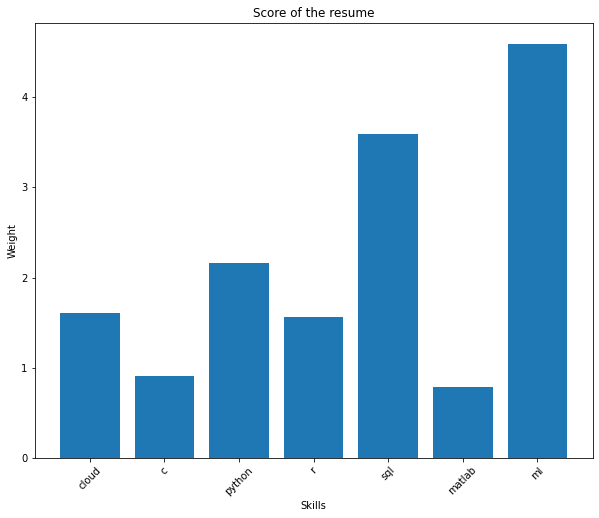

In [0]:
#importing packages
import numpy as np
import matplotlib.pyplot as plt

print(score)
#calculating overall score
score_ = np.asarray([val for val in score.values()]).sum()/np.asarray([val for val in top_skills_by_earlier_analysis.values()]).sum()
print('Overall score of the resume out of 1 is {}'.format(score_))
#visualizing scores associated with each skill
plt.figure(figsize=(10, 8))
plt.bar(range(len(score)), list(score.values()), align='center')
plt.xticks(range(len(score)), list(score.keys()))
plt.xticks(rotation=45)
plt.xlabel('Skills')
plt.ylabel('Weight')
plt.title('Score of the resume')
plt.show()

In [0]:
#Sorting different topics and subtopics based on weights
sorted_topics = sorted(top_skills_by_earlier_analysis.items(), key=lambda x: x[1], reverse = True)    
sorted_vis_subtopics = sorted(v_subtopics.items(), key=lambda x: x[1], reverse = True)    
sorted_framework_subtopics = sorted(f_subtopics.items(), key=lambda x: x[1], reverse = True)    
sorted_bd_subtopics = sorted(bd_subtopics.items(), key=lambda x: x[1], reverse = True)    

<h2>Suggesting skills by using different weights obtaines in the parts before.</h2>

In [0]:
#print the skills available in resume
print('Topics already present in resume')
list_t = [key for key in score.keys()]
sub_topics = []
for t in top_skills_subtopics:
  sub_topics.append(t[0])
list_t = list_t + sub_topics
print(list_t)

suggest = {}
for skill in top_skills:
  if skill not in score.keys():
    #Suggesting some of the top topics in the
    #Sacling up the weights of top_topics and not sub topics
    if skill == 'visualization':
      sum_3 = (sorted_vis_subtopics[0][1] + sorted_vis_subtopics[1][1]+ sorted_vis_subtopics[2][1])
      for i in range(3):
        suggest[sorted_vis_subtopics[i][0]] = sorted_vis_subtopics[i][1]*(top_skills_by_earlier_analysis[skill]/sum_3)
    if skill == 'framework':
      sum_3 = (sorted_framework_subtopics[0][1] + sorted_framework_subtopics[1][1]+ sorted_framework_subtopics[2][1])
      for i in range(3):
        suggest[sorted_framework_subtopics[i][0]] = sorted_framework_subtopics[i][1]*(top_skills_by_earlier_analysis[skill]/sum_3)
    if skill == 'big data':
      sum_3 = (sorted_bd_subtopics[0][1] + sorted_bd_subtopics[1][1]+ sorted_bd_subtopics[2][1])
      for i in range(3):
        suggest[sorted_bd_subtopics[i][0]] = sorted_bd_subtopics[i][1]*(top_skills_by_earlier_analysis[skill]/sum_3)
    
#matching other skills and sorting them in order
for skills in top_skills_by_earlier_analysis.keys():
  if skills not in top_skills:
    if skills not in score.keys():
      suggest[skills] = top_skills_by_earlier_analysis[skills]


#Sorting different topics and subtopics based on weights    
sorted_suggestion = sorted(suggest.items(), key=lambda x: x[1], reverse = True)
print('Suggestions ')
print(sorted_suggestion)    

Topics already present in resume
['cloud', 'c', 'python', 'r', 'sql', 'matlab', 'ml']
Suggestions 
[('deep learning', 4.387056814449918), ('automated tools', 3.4303378215654083), ('excel', 3.093942857142857), ('tableau', 2.8124427067943323), ('tensorflow', 2.653637404570748), ('statistics', 2.5773714285714284), ('spark', 1.5571230362508215), ('d3', 1.4939497914945115), ('caret', 1.2927713955386673), ('bokeh', 1.2913962263964327), ('java', 1.2577068418171866), ('ensemble method', 1.1726826491516147), ('big data analytics', 0.959826574371049), ('sap', 0.8339638326218392), ('scripting', 0.8336070060207992), ('mining', 0.6231467221641172), ('optimization', 0.6134857142857143), ('probability models', 0.5911330049261084), ('c++', 0.2816091954022989), ('probability model', 0.2425904761904762), ('analytics', 0.21851428571428572), ('simulation', 0.14110476190476187), ('time series', 0.0832)]


{'tableau': 2.8124427067943323, 'd3': 1.4939497914945115, 'bokeh': 1.2913962263964327, 'tensorflow': 2.653637404570748, 'caret': 1.2927713955386673, 'sap': 0.8339638326218392, 'spark': 1.5571230362508215, 'big data analytics': 0.959826574371049, 'mining': 0.6231467221641172, 'analytics': 0.21851428571428572, 'automated tools': 3.4303378215654083, 'c++': 0.2816091954022989, 'deep learning': 4.387056814449918, 'ensemble method': 1.1726826491516147, 'excel': 3.093942857142857, 'java': 1.2577068418171866, 'optimization': 0.6134857142857143, 'probability model': 0.2425904761904762, 'probability models': 0.5911330049261084, 'scripting': 0.8336070060207992, 'simulation': 0.14110476190476187, 'statistics': 2.5773714285714284, 'time series': 0.0832}


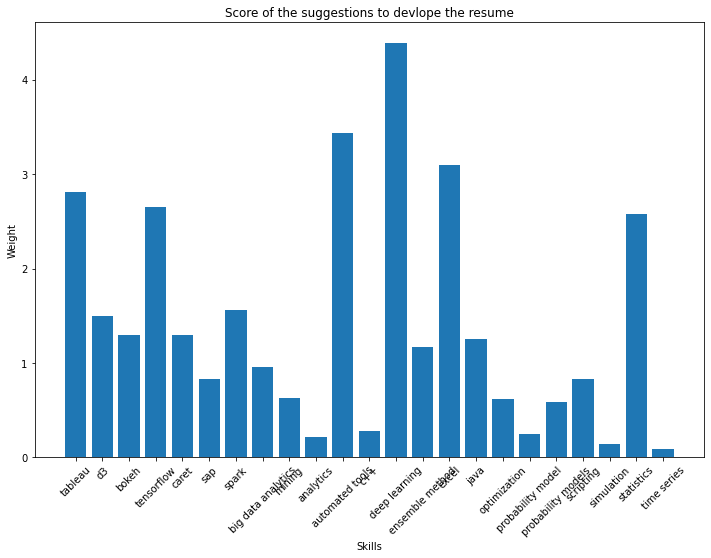

In [0]:
#Visualizaing suggestions
print(suggest)

plt.figure(figsize=(12, 8))
plt.bar(range(len(suggest)), list(suggest.values()), align='center')
plt.xticks(range(len(suggest)), list(suggest.keys()))
plt.xticks(rotation=45)
plt.xlabel('Skills')
plt.ylabel('Weight')
plt.title('Score of the suggestions to devlope the resume')
plt.show()

<h2>Finding top and matching job postings to skills of the resume holder.</h2>

In [0]:
# reading job posting csv
job =pd.read_csv('Final_ResultsF.csv',sep=',')
# recieve all the skills for first 3000 jobs
job_posting = job.iloc[:, 7:141] #Right now just suggesting from subset of job postings

In [0]:
job.iloc[0:1, 1:7]

,city,job,company,location,salary,link
0,Los+Angeles,Machine Learning Engineer,Triplebyte,"Los Angeles, CA","$150,000 - $250,000 a year",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...


In [0]:
job.iloc[0:1, 142:]

,Experience,job_type,Contract_Type
0,None,engineering,None


In [0]:
job_posting

,Cleaned_summary,python,sql,excel,java,c,c+,c++,r,tableau,spark,hadoop,m,azure,tensorflow,acumendesign,sap,d3,cloud,project management,audit,data mining,creating algorithms,computer skills,data manipulation,data wrangling,big data,api,apiengine,aws,dplyr,information retrieval,interpreting data,keras,mathematics,statistics,matlab,microsoft excel,powerpoint,predictive models,...,ensemble methods,knn,naives bayes,svm,hypothesis testing,decision trees,web scraping,chatbots,network analysis,bokeh,cluster analysis,gradient boosting,principle component analysis,build pipeline,feature engineering,monte carlo,hyperparameter tuning,model validation,ggplot,plotly,geoplotlib,model training,model testing,relational Database,pyspark,query tuning,error handling,recursive queries,postgresql,triggers,neural nets,tensors,kafka,pivot tables,conditional formating,multivariable calculus,nosql,scikit,scipy,xgboost
0,triplebytetriplebyte transforming way software...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,fortune 500 client looking hire senior data sc...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,staff data scientist engineeringfor first time...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,opportunity overview hbo max future entertainm...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,dodolphin withdolphincom free resource helps ...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,background canceriq wwwcanceriqcom venturebac...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,decision science scientist sr 0106174 senior ...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,axiom group partnered elite quantitative tradi...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,

In [0]:
#forming a dictionary that includes important skills 
required_skill = {}
for i in job_posting.index:
    intermediate = []
    # if the skill is in job posting, then we have have to add it to required skills for the job
    for j in job_posting:
        if job_posting.loc[i][j] != 0:
          if j in skills_type.keys():
            intermediate.append(skills_type[j]) #Only suggesting based on technical skills
    required_skill[i] = intermediate       
required_skill

{0: ['ml'],
 1: ['python', 'sql', 'r', 'big data', 'statistics', 'statistics'],
 2: ['python',
  'sql',
  'r',
  'big data',
  'big data',
  'statistics',
  'statistics',
  'probability model',
  'deep learning'],
 3: ['python',
  'sql',
  'r',
  'visualization',
  'big data',
  'statistics',
  'statistics',
  'ml',
  'ml',
  'ml',
  'ml',
  'ml',
  'ml',
  'optimization',
  'ml'],
 4: ['python', 'sql'],
 5: ['cloud', 'cloud', 'visualization', 'ml'],
 6: ['sql', 'excel', 'r', 'visualization'],
 7: ['python',
  'sql',
  'r',
  'statistics',
  'statistics',
  'ml',
  'ml',
  'optimization',
  'ml'],
 8: ['sql',
  'excel',
  'r',
  'visualization',
  'big data',
  'big data',
  'framework',
  'cloud',
  'big data',
  'statistics',
  'matlab',
  'ml',
  'probability model',
  'visualization',
  'framework'],
 9: ['python',
  'ml',
  'deep learning',
  'ml',
  'ml',
  'visualization',
  'framework',
  'deep learning',
  'framework'],
 10: ['sql',
  'excel',
  'big data',
  'statistics',
  '

In [0]:
#join the skills requires for each job by ','
r_idx = [idx for idx in required_skill.keys()]
r_skill = [",".join(skills) for skills in required_skill.values()]
required_skill_list = [r_idx, r_skill]

In [0]:
#formatting required_skill_list
required_skill_list = np.array(required_skill_list)
required_skill_list = required_skill_list.T
required_skill_list.shape

(22949, 2)

In [0]:
#making a dataframe of required skills
req_skills = pd.DataFrame(required_skill_list,columns=['ID','requirements'])
req_skills.to_csv(r'Job_requirements_Final_ResultF.csv', index = False)

In [0]:
#job id and requirments output
job_req =pd.read_csv('Job_requirements_Final_ResultF.csv',sep=',')
job_req.head()

,ID,requirements
0,0,ml
1,1,"python,sql,r,big data,statistics,statistics"
2,2,"python,sql,r,big data,big data,statistics,stat..."
3,3,"python,sql,r,visualization,big data,statistics..."
4,4,"python,sql"


In [0]:
#fill jobs missing requirments
job_req['requirements'].fillna("No requirements", inplace = True) 
required_skill = {}
idx = 0
#split the requirments by ","
for req in job_req['requirements']:
  if req != "No requirements":
    required_skill[idx] = req.split(',')
  else:
    required_skill[idx]= []
  idx += 1

In [0]:
degree = {}
# making dictionary for degrees in job postings
for i in range(len(required_skill)):
    ele = []
    for k in ['phd','masters','bachelor']:
        if k in set(required_skill[i]):
            ele.append(k)
        
    degree[i] = ele

In [0]:
# suggest the best job and find missing skills
def find_job():
    global required_skill, job
    global score, resume_degree
    matched_job_idx = []
    for idx in range(len(required_skill)):
      #making sure degrees are matching
      valid = 1
      if degree[idx]:
        for k in degree[idx]:
          if  k not in resume_degree:
            valid = 0 
        
      if valid == 1:
        match = 0
        if required_skill[idx]:#Consider only the jobs with atleast one required skill
          for r in required_skill[idx]:
            if r in score.keys():
              match += 1
          if (match/len(required_skill[idx]) > 0.9):
            matched_job_idx.append(idx)
        
    #Extracting details like company name, link of the job postings from their index  
    matching_job_details = []
    for i in matched_job_idx:
      job_details = job.iloc[i, 1:7].values.tolist()
      job_details_ = job.iloc[i, 142:].values.tolist()
      del job_details_[0]
      job_details = job_details + job_details_
      job_details[0].replace('+', ' ')
      matching_job_details.append(job_details)
    return matching_job_details

In [0]:
# call find_job function
matching_job_details = find_job()

In [0]:
#display results
matching_job_details[0:5]

[['Los+Angeles',
  'Machine Learning Engineer',
  'Triplebyte',
  'Los Angeles, CA',
  '$150,000 - $250,000 a year',
  'https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0AMr11YIOo206dX9CE572HoIBzjTozchv3QrfVeNVhstkwcCiRL45lO8Ev8PLQXhPG6mqMgnhX7bWDfrbK8albVSZLNNBMD9zjsKOc2ijiRULWjVSWm0BQn54rJqIQMlcUEyMwew--sMEeUbHQlZFOQVSjQgG_U61ihOX_c2cOfySTWWEDav2EazsSktmrf7k3sfJUBVdzvpfRwGz0H0AWieVOx4gruAg0I-XukNCP8M_BGT0nB1XWywSrme3xyCHaWuyJBNguF1rumqE8vt6KM3J-Xe6M8uYp3EC0m1OHXNc8kGblCNGz-KQISKMFOPOZ_mIhSQi9oqcQPmMvDUBHWlVFVWmDlr3ZY6DHRws0ebIG9ZBXVvJ5lT6hIz1JdZ324jZjfazJunmeaFpQVIuyUN9Ck1P-3hQS4kaiJHPEjSPaE6-EHgGmNBINbcJLRdBnxRlzSMq7MAb9tZsG8aOAs91BFKPAQdiinwq-QeLC3iBRYtQ_V-iT0xi1W2xMKcjyJumKBsQtK5zdeyR2WeOPBpTSqb8ctd7o=&p=0&fvj=1&vjs=3',
  'engineering',
  'None'],
 ['Los+Angeles',
  'Data Science Intern',
  'Dolphin',
  'Los Angeles, CA 90013',
  '$25 an hour',
  'https://www.indeed.com/company/Dolphin/jobs/Data-Science-Intern-2ce86b99ca519fa5?fccid=13f54e92876e47ff&vjs=3',
  'engineering',
  't

In [0]:
#display output
found_jobs = pd.DataFrame(matching_job_details, columns=['City','Job Title', 'Company', 'Location', 'Annual Salary', 'Link', 'Field', 'Contract Type'])
found_jobs

,City,Job Title,Company,Location,Annual Salary,Link,Field,Contract Type
0,Los+Angeles,Machine Learning Engineer,Triplebyte,"Los Angeles, CA","$150,000 - $250,000 a year",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,engineering,None
1,Los+Angeles,Data Science Intern,Dolphin,"Los Angeles, CA 90013",$25 an hour,https://www.indeed.com/company/Dolphin/jobs/Da...,engineering,temporary
2,Los+Angeles,Machine Learning Engineer,Triplebyte,"Los Angeles, CA","$150,000 - $250,000 a year",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,engineering,None
3,Los+Angeles,Machine Learning Engineer,Triplebyte,"Los Angeles, CA","$150,000 - $250,000 a year",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,engineering,None
4,Los+Angeles,Machine Learning Engineer,Triplebyte,"Los Angeles, CA","$150,000 - $250,000 a year",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,engineering,None
...,...,...,...,...,...,...,...,...
2105,"Toronto, ON",Junior Programmer (.Net C#),Kinectrics,"— Toronto, ON","Estimated: $62,000 - $78,000 a year",https://www.workopolis.com/jobsearch/viewjob/P...,engineering,temporary
2106,"Ottawa, ON","Data Visualization Specialist, NSW",NOKIA,"— Ottawa, ON","Estimated: $55,000 - $72,000 a year",https://www.workopolis.com/jobsearch/viewjob/O...,engineering,None
2107,"Toronto, ON","Engineering Manager, Machine Learning",BenchSci,"— Toronto, ON","Estimated: $76,000 - $96,000 a year",https://www.workopolis.com/jobsearch/viewjob/M...,engineering,None
2108,"Mississauga, ON","Country Medical Affairs Principal Scientist, C...",GSK,"— Mississauga, ON","Estimated: $86,000 - $120,000 a year",https://www.workopolis.com/jobsearch/viewjob/C...,engineering,None
